# A few notes on matplotlib

Matplotlib is a library whose logic and functionality is closely modeled after Matlab. Hence, if you know your way around plotting in Matlab, getting things to work in python should be easy.

Extensive documentation is available at:

http://matplotlib.org

Let's put everything in one script to see how things work (example compiled from several of Valentin Haenel's tutorials):

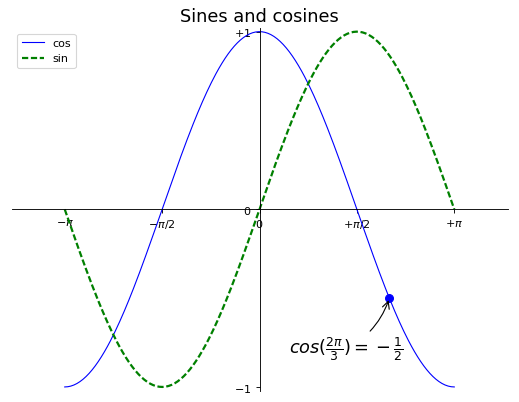

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-",label="cos")

# Plot sine with a green dashed line of width 2 (pixels)
plt.plot(X, S, color="green", linewidth=2.0, linestyle="--",label="sin")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Set y limits
plt.ylim(-1.02, 1.02)

# set x-ticks and y-ticks to more interesting values for sin/cos
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])


# annotate a point
t = 2 * np.pi / 3
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')
plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


# instead of having the axes surround the figure, we now shift them to the
# middle by changing the "spines" property of the axes
# note, that for this, we simply throw away the top and right lines and
# move the bottom and left lines to "0"
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))


# add the legend using the labels defined in the plt functions
plt.legend(loc='upper left')

# set title and fontsize
plt.title("Sines and cosines",fontsize=16)

# We could now save the figure using 72 dots per inch
plt.savefig("sinewaves.png", dpi=72)

# Show result on screen
plt.show()


Here's a little 3D plot combining a surface plot and a contour plot in one set of 3D axes. Note, that we import the nice-looking background axes from a different package.

In addition, we open a separate figure here in this file. This makes no difference in ipython, but it would open another window, when executed as a script!

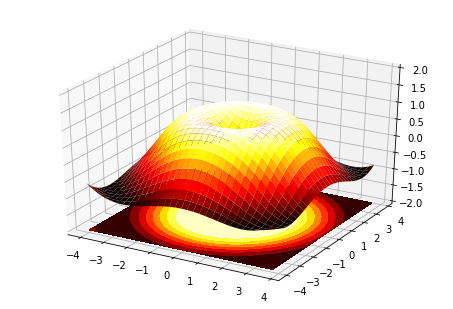

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)

plt.show()

Here are further examples (including code) for creating different types of figures:

http://www.scipy-lectures.org/intro/matplotlib/auto_examples/index.html#code-generating-the-summary-figures-with-a-title